## Web Analytics DATA 620 - Week 04 - Part 02
## Assignment: “High Frequency Words”
## Group - Chris Bloome / Mustafa Telab / Vinayak Kamath
## Date - 27th June 2021

## 1. Choose a corpus of interest.

For this homework, we wanted to use a corpus from the TV Game Show Jeopardy. This corpus contains all questions asked (well, answers in Jeopardy parlance, but to be clear, these are the things the host says to the contestants) in most of the show's history, over 250,000. This corpus was generated by crawling www.j-archive.com and the findings were initially posted on Reddit and hosted by the user on Google Drive. https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/


In [1]:
# Load Dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/ChristopherBloome/SPS_MSDS_SMR21_DATA620/main/Week4-HW/JEOPARDY_CSV.csv'
Jeopardy_Data_Raw = pd.read_csv(url,index_col=0,parse_dates=[0])

# Isolate questions
Question_List_Raw = Jeopardy_Data_Raw[' Question']

In [2]:
# Join questions into long string 
word_list = ' '.join(Question_List_Raw)

# Split string into individual words
word_list = word_list.split()


In [3]:
# Remove special chars, nums  
for i in range(len(word_list)):
    alphanumeric = ""
    for character in word_list[i]:
        if character.isalpha():
            #print(character)
            alphanumeric = alphanumeric + character
            #print(alphanumeric)
        word_list[i] = alphanumeric.upper()

In [4]:
# Generate Dict with word count
word_list_ct = pd.Series(word_list).value_counts().to_dict()

# Convert Dict to DF
word_list_df = pd.DataFrame(list(word_list_ct.items()),columns = ['word','count']) 

In [5]:
# Control Check - sum of word counts is equal to legnth of word list
word_list_df['count'].sum() == len(word_list)


True

In [6]:
# Remove blanks and HTML (see question 2 below)
word_list_df = word_list_df[word_list_df.word != ""]
word_list_df = word_list_df[~word_list_df['word'].str.contains("WWW")]
word_list_df = word_list_df[~word_list_df['word'].str.contains("TARGET")]

## 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

We defined unique words as any string found in a jeopardy question. As we removed special characters and numbers, there are some similar words which could be said to be different, which would be considered the same in our analysis: "it's" is equivalent to "its" et al. These should not have an impact on our study. 

In working with the data, we found that JPEG and mp3 files were stored as a link to their location on www.j-archive.com as well as HTML attributes, resulting in "words" like: HREFHTTPWWWJARCHIVECOMMEDIAJJPG and TARGETBLANK.  As a result, we removed all websites and HTML attributes from the corpus. 

In [7]:
print("Total Unique Words: ")
print(len(word_list_df))


Total Unique Words: 
102789


## 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [8]:
half = word_list_df['count'].sum()/2
i=2

while word_list_df[0:i]['count'].sum() < half:
    i = i+1

print("Least amount of unique words representing half the total words in corpus:")
i


Least amount of unique words representing half the total words in corpus:


164

## 4. Identify the 200 highest frequency words in this corpus.

In [9]:
list(word_list_df[0:200]['word'])

['THE',
 'THIS',
 'OF',
 'IN',
 'A',
 'TO',
 'FOR',
 'IS',
 'WAS',
 'ON',
 'ITS',
 'FROM',
 'WITH',
 'HIS',
 'AS',
 'BY',
 'IT',
 'THESE',
 'HE',
 'THAT',
 'AN',
 'ONE',
 'AT',
 'NAME',
 'YOU',
 'OR',
 'FIRST',
 'ARE',
 'WHO',
 'BE',
 'I',
 'CITY',
 'WHEN',
 'HER',
 'US',
 'HAS',
 'AND',
 'NAMED',
 'S',
 'CALLED',
 'ABOUT',
 'HAVE',
 'LIKE',
 'SEEN',
 'CAN',
 'NEW',
 'MAN',
 'NOT',
 'AFTER',
 'COUNTRY',
 'BUT',
 'SHE',
 'FILM',
 'STATE',
 'TYPE',
 'CLUE',
 'WERE',
 'UP',
 'WORD',
 'YOUR',
 'MADE',
 'TITLE',
 'USED',
 'CREW',
 'WHICH',
 'HERE',
 'KNOWN',
 'HAD',
 'NO',
 'ALSO',
 'TH',
 'IF',
 'INTO',
 'OUT',
 'ONLY',
 'ALL',
 'HIM',
 'SAID',
 'MAY',
 'BECAME',
 'YEARS',
 'OVER',
 'PLAYED',
 'PRESIDENT',
 'MY',
 'NOVEL',
 'WROTE',
 'TERM',
 'BEFORE',
 'AMERICAN',
 'LAST',
 'THEIR',
 'CAPITAL',
 'PART',
 'WORLD',
 'MOST',
 'KING',
 'THAN',
 'WAR',
 'BOOK',
 'FAMOUS',
 'FRENCH',
 'WON',
 'SOME',
 'MORE',
 'ISLAND',
 'JOHN',
 'SHOW',
 'NOW',
 'BEEN',
 'THEY',
 'TIME',
 'HOME',
 'LETTER',
 '

## 5. Create a graph that shows the relative frequency of these 200 words.

<function matplotlib.pyplot.show(*args, **kw)>

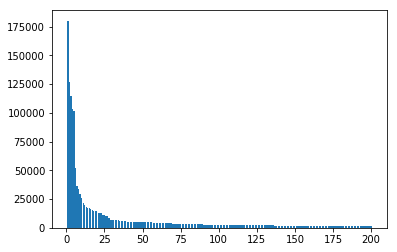

In [12]:
import matplotlib.pyplot as plt
plt.bar(x=list(range(1,201)), height=list(word_list_df[0:200]['count']))
plt.show

## 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

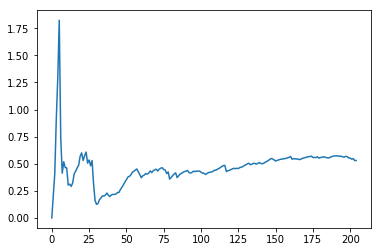

In [11]:
# Turn Off Warnings 
import warnings
warnings.filterwarnings('ignore')

# Narrow DF 
t200_df = word_list_df[0:200]

# Total Word Count - 
# Note, I was not sure if we should use the word count form the entire data set or just the top 200 words. 
# I studied both and found that this did not impact our findings. 
word_count_t200 = t200_df['count'].sum()

# Rank
t200_df['rank'] = list(range(1,201))

# Zipf Fraction
t200_df['z_frac'] = 1/t200_df['rank']

most_pop_word = t200_df['count'][0]

# Zipf frequency 
t200_df['z_freq']=t200_df['z_frac']*most_pop_word

# Percentage Diffence
t200_df['z_diff'] =  (t200_df['count'] - t200_df['z_freq'])/t200_df['z_freq']

plt.plot(t200_df['z_diff'])


Above we see a plot of the difference in actual word frequency over the expected word frequency as per Zipf’s law. We initially see a huge spike at the second most common word, before a drop around the 7th and 10th most common words, and then a second increase followed by a drop and a gradual increase to leveling around an actual frequency of 50% higher than expected per Zipf's law. 

I would argue that despite the fact that these words seem on average 50% more frequent than the law should suggest, this does largely follow Zipf's law, especially when you consider the nature of the data set. 


## 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

Referring to the Zipf's law plot and thinking about the nature of this corpus, a few things come into focus. As these are all questions, certain words are going to be significantly more common and arguably more consistent in their usage when compared to other corpora: the jeopardy equivilant of who/what/where/when (remember you technially answer with the question, leading to interesting word usage). It is likely that the top 25 most common words are used in a manner more consistent than more natural spoken or written language. Additionally, on the other end, we will likely find more unique words than other corpora as these are by definition questions related to a varied subject matter.
